![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
data = pd.read_excel('BBDD_Hospitalización.xlsx')

# Revisar la estructura del dataset
print(data.head())
print(data.info())


   EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES   PSA BIOPSIAS PREVIAS  \
0  53.0       NO                         NO   4.0               NO   
1  56.0       NO                         NO   7.7               NO   
2  57.0       NO                         NO  29.0               SI   
3  56.0       NO                         NO   7.0               NO   
4  55.0       NO                         NO  29.0               SI   

  VOLUMEN PROSTATICO ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  \
0                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
1                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
2                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
3                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
4                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   

   NUMERO DE MUESTRAS TOMADAS CUP ENF. CRONICA PULMONAR OBSTRUCTIVA BIOPSIA  \
0                        12.0  NO                                NO     NEG   
1                        12.0  NO   

C:\Users\Familia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

Respuesta: considero que las siguientes 5 variables aportan poco o nada al analisis que se quiere hacer, mostrando datos que pueden ser confusos para su analisis.

In [10]:
# Eliminar las columnas consideradas irrelevantes para el análisis inicial
columns_to_drop = [
    'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
    'TIPO DE CULTIVO',
    'AGENTE AISLADO',
    'PATRON DE RESISTENCIA',
    'HOSPITALIZACIÓN ULTIMO MES'
]

data = data.drop(columns=columns_to_drop)

# Intentar cargar el archivo de Excel de nuevo
try:
    data = pd.read_excel('BBDD_Hospitalización.xlsx')
    print("Archivo cargado exitosamente")
    print(data.columns)
    print(data.head())
except Exception as e:
    print(f"Error al cargar el archivo: {e}")

# Intentar cargar el archivo de Excel de nuevo
try:
    data = pd.read_excel('BBDD_Hospitalización.xlsx')
    print("Archivo cargado exitosamente")
except Exception as e:
    print(f"Error al cargar el archivo: {e}")

# Mostrar una vista previa de los datos
data.head()

C:\Users\Familia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Archivo cargado exitosamente
Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'NUMERO DE MUESTRAS TOMADAS',
       'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
       'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
       'PATRON DE RESISTENCIA', 'HOSPITALIZACION', 'DIAS HOSPITALIZACION MQ',
       'DIAS HOSPITALIZACIÓN UPC'],
      dtype='object')
   EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES   PSA BIOPSIAS PREVIAS  \
0  53.0       NO                         NO   4.0               NO   
1  56.0       NO                         NO   7.7               NO   
2  57.0       NO                         NO  29.0               SI   
3  56.0       NO                         NO   7.0               NO   
4  55.0       NO                         NO  29.0               SI   

  VOLUMEN PROS

C:\Users\Familia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

In [11]:
# Mostrar un resumen estadístico de las variables numéricas
print(data.describe())

             EDAD         PSA  NUMERO DE MUESTRAS TOMADAS  \
count  568.000000  564.000000                  568.000000   
mean    63.882042   13.271401                   12.996479   
std      9.281517   15.668966                    3.921180   
min     39.000000    0.600000                    4.000000   
25%     59.000000    5.600000                   12.000000   
50%     64.000000    8.000000                   12.000000   
75%     69.000000   15.000000                   12.000000   
max    151.000000  100.000000                   24.000000   

       DIAS HOSPITALIZACION MQ  DIAS HOSPITALIZACIÓN UPC  
count               568.000000                568.000000  
mean                  0.165493                  0.014085  
std                   0.958066                  0.196474  
min                   0.000000                  0.000000  
25%                   0.000000                  0.000000  
50%                   0.000000                  0.000000  
75%                   0.000000       

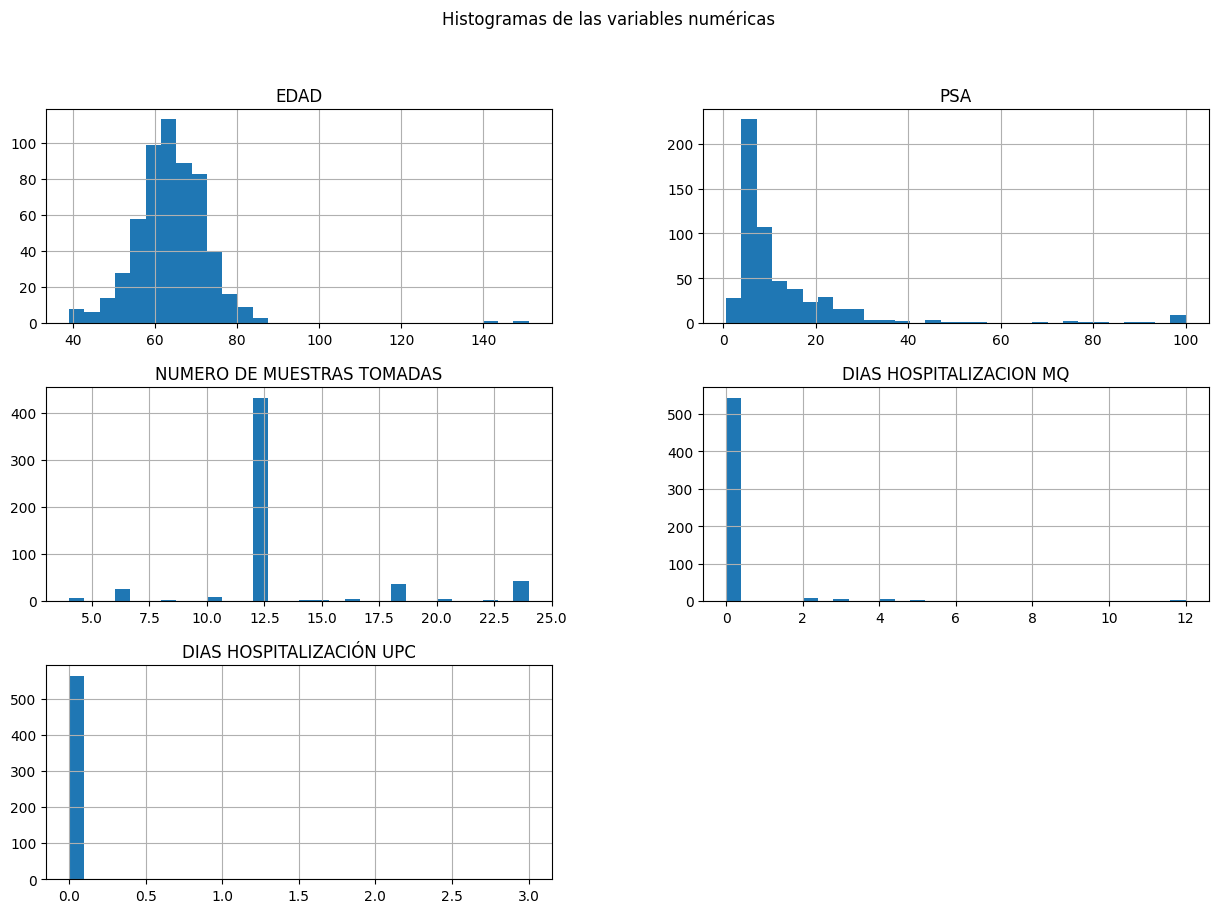

In [12]:
# Histograma
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogramas de las variables numéricas')
plt.show()

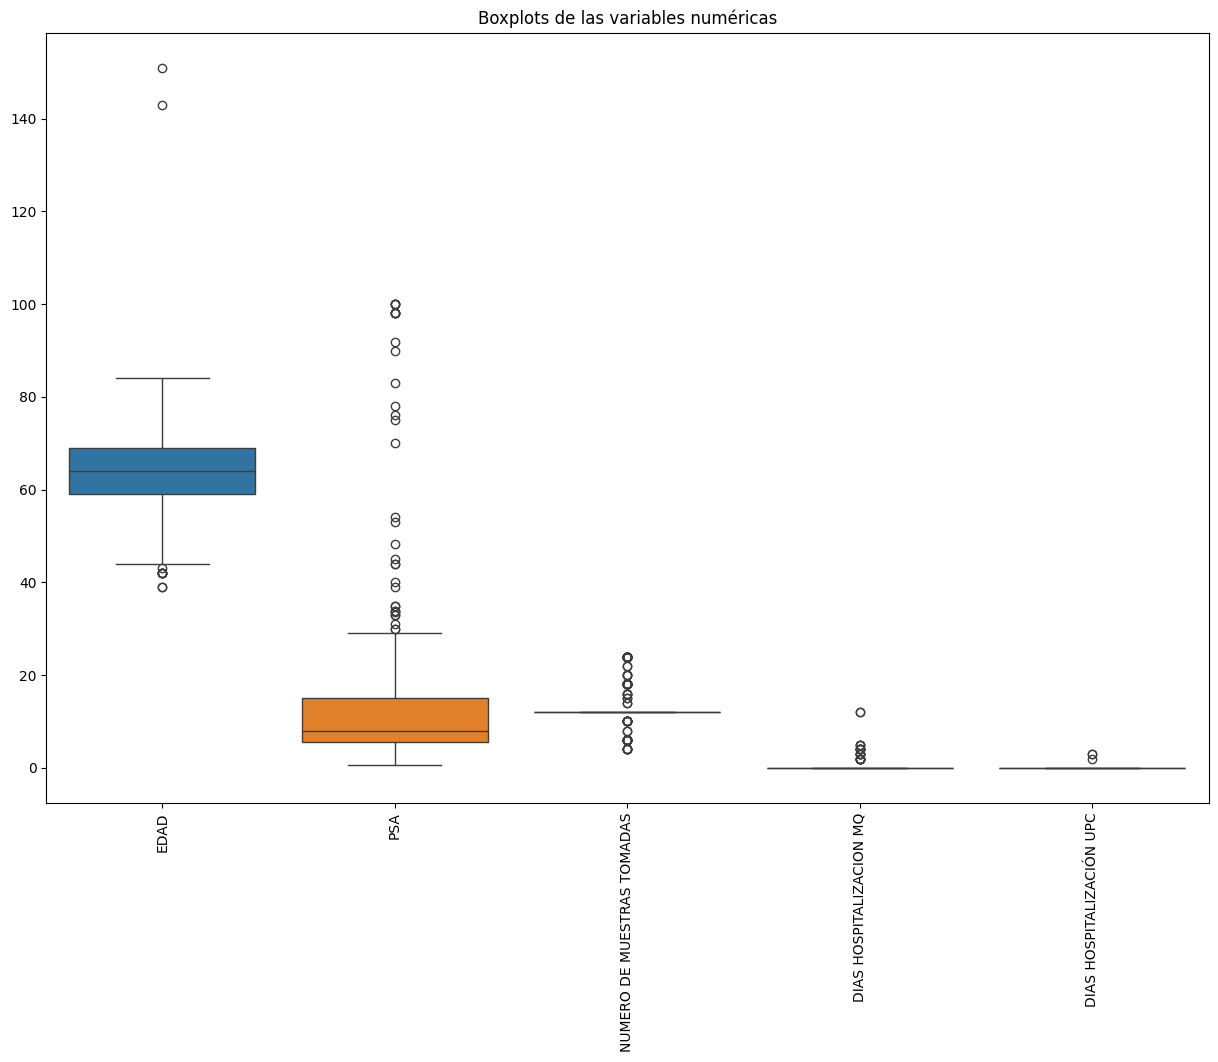

In [13]:
# Boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.select_dtypes(include=[np.number]))
plt.title('Boxplots de las variables numéricas')
plt.xticks(rotation=90)
plt.show()

C:\Users\Familia\AppData\Local\Temp\ipykernel_21436\52920556.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, label=column)
C:\Users\Familia\AppData\Local\Temp\ipykernel_21436\52920556.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, label=column)
C:\Users\Familia\AppData\Local\Temp\ipykernel_21436\52920556.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, label=column)
C:\Users\Familia\AppData\Local\Temp\ipykernel_21436\52920556.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become a

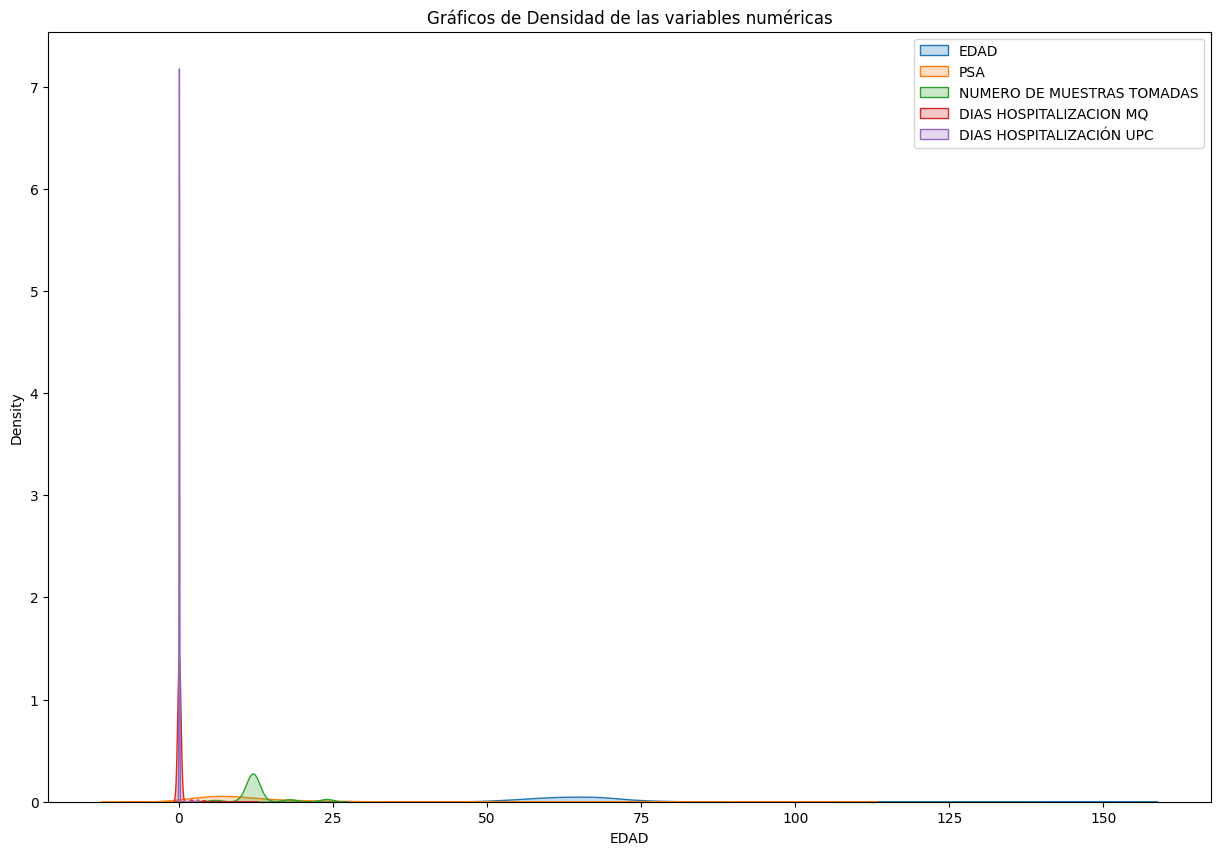

In [14]:
# Gráficos de Densidad
plt.figure(figsize=(15, 10))
for column in data.select_dtypes(include=[np.number]).columns:
    sns.kdeplot(data[column], shade=True, label=column)
plt.title('Gráficos de Densidad de las variables numéricas')
plt.legend()
plt.show()

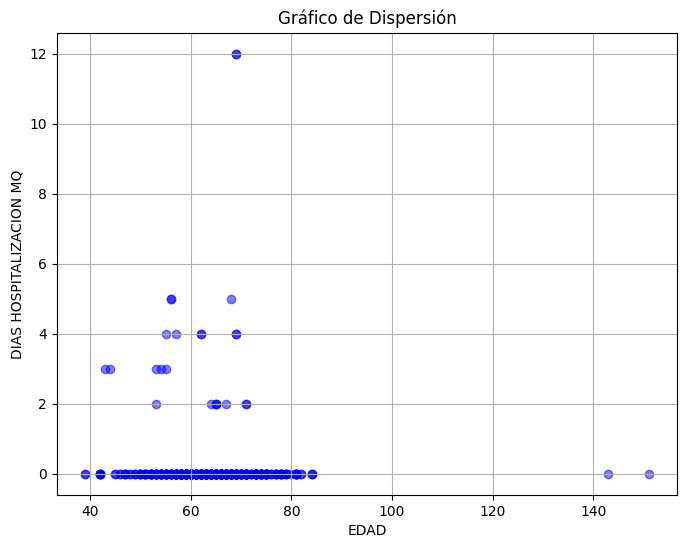

In [15]:
# Extraer las columnas de interés para el gráfico de dispersión
x = data['EDAD']
y = data['DIAS HOSPITALIZACION MQ']

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.scatter(x, y, color='blue', marker='o', alpha=0.5)  # Scatter plot

# Personalizar el gráfico
plt.title('Gráfico de Dispersión')
plt.xlabel('EDAD')
plt.ylabel('DIAS HOSPITALIZACION MQ')
plt.grid(True)  # Mostrar cuadrícula

# Mostrar el gráfico
plt.show()

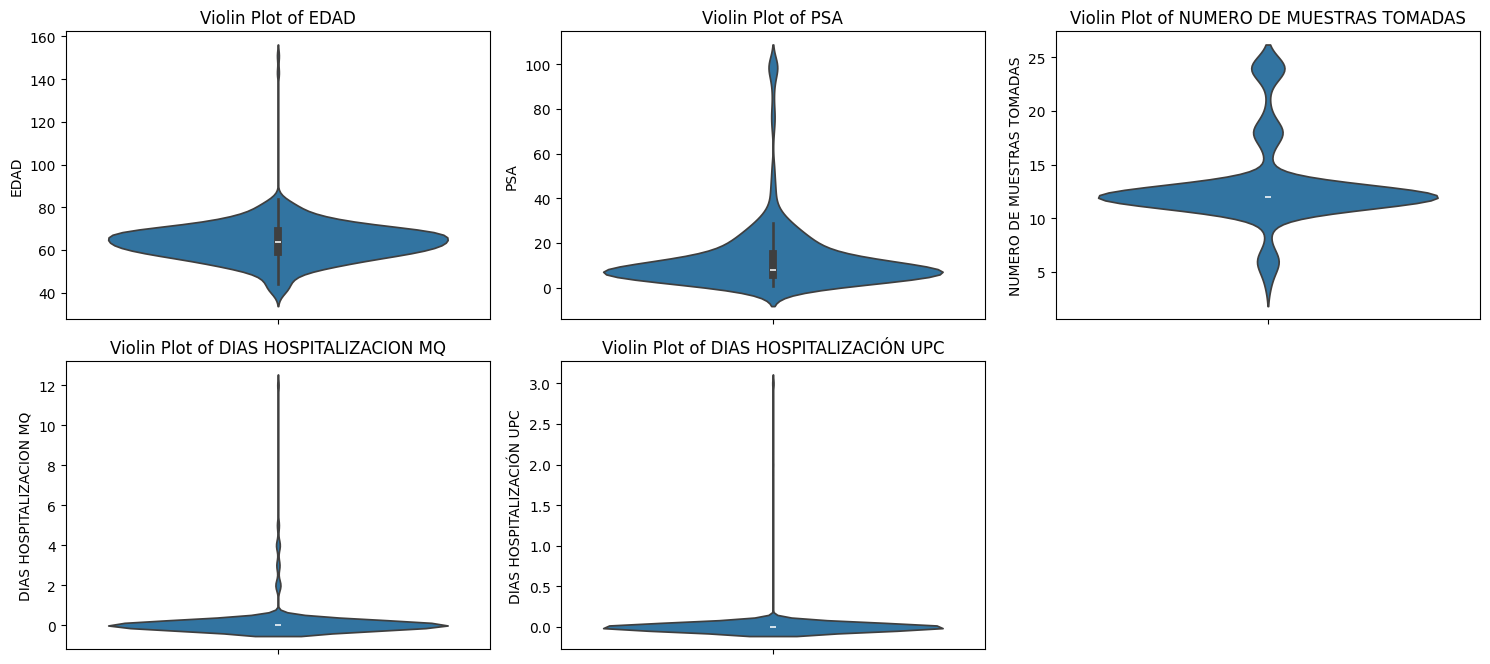

In [17]:
# Diagrama de Violín para las variables numéricas
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(y=data[column])
    plt.title(f'Violin Plot of {column}')
plt.tight_layout()
plt.show()


Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

Respuesta: imputariamos datos atipicos a fin de que se pueda preservar la cantidad de datos posibles, lo que puede ser importante al tener un conjunto de datos pequeño.

In [19]:
# Imputar valores nulos
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].mean(), inplace=True)

# Verificar que no haya valores nulos después de la imputación
print(data.isnull().sum())

EDAD                                                                         0
DIABETES                                                                     0
HOSPITALIZACIÓN ULTIMO MES                                                   0
PSA                                                                          0
BIOPSIAS PREVIAS                                                             0
VOLUMEN PROSTATICO                                                           0
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                      0
NUMERO DE MUESTRAS TOMADAS                                                   0
CUP                                                                          0
ENF. CRONICA PULMONAR OBSTRUCTIVA                                            0
BIOPSIA                                                                      0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA    0
FIEBRE                                              

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

In [22]:
from sklearn.preprocessing import LabelEncoder

# Codificar las variables categóricas
categorical_features = data.select_dtypes(include=['object']).columns

for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

# Verificar la transformación
print(data.head())
print(data.info())

   EDAD  DIABETES  HOSPITALIZACIÓN ULTIMO MES   PSA  BIOPSIAS PREVIAS  \
0  53.0         0                           0   4.0                 0   
1  56.0         0                           0   7.7                 0   
2  57.0         0                           0  29.0                 1   
3  56.0         0                           0   7.0                 0   
4  55.0         0                           0  29.0                 1   

   VOLUMEN PROSTATICO  ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  \
0                   1                                        1   
1                   1                                        1   
2                   1                                        1   
3                   1                                        1   
4                   1                                        1   

   NUMERO DE MUESTRAS TOMADAS  CUP  ENF. CRONICA PULMONAR OBSTRUCTIVA  \
0                        12.0    0                                  0   
1                 

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [23]:
# Imputar valores nulos
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].mean(), inplace=True)

# Verificar que no haya valores nulos después de la imputación
print(data.isnull().sum())

EDAD                                                                         0
DIABETES                                                                     0
HOSPITALIZACIÓN ULTIMO MES                                                   0
PSA                                                                          0
BIOPSIAS PREVIAS                                                             0
VOLUMEN PROSTATICO                                                           0
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                      0
NUMERO DE MUESTRAS TOMADAS                                                   0
CUP                                                                          0
ENF. CRONICA PULMONAR OBSTRUCTIVA                                            0
BIOPSIA                                                                      0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA    0
FIEBRE                                              

Este enfoque asegura que los valores atípicos sean manejados de manera adecuada y que el conjunto de datos esté listo para el análisis y modelado posterior.

El boxplot muestra una distribución de edad bastante centrada, con la mayoría de los valores entre aproximadamente 55 y 75 años.

No hay valores atípicos visibles en el boxplot, lo que sugiere que los valores atípicos han sido eliminados correctamente.

El histograma muestra una distribución aproximadamente normal de las edades.

La mayoría de los pacientes tienen edades entre 55 y 75 años, con un pico alrededor de los 65 años.

No hay valores extremos, lo cual confirma que los outliers han sido eliminados.

No hay valores extremos, lo cual confirma que los outliers han sido eliminados.

El boxplot muestra una dispersión de valores de PSA con algunos outliers todavía visibles, aunque menos en comparación con los datos originales.
Los valores de PSA están principalmente entre 5 y 10, con algunos puntos fuera de este rango superior a 15.

El histograma muestra que la mayoría de los valores de PSA están concentrados entre 5 y 10, con una caída hacia valores mayores.
La presencia de algunos valores superiores a 15 sugiere que aún podría haber algunos outliers, aunque menos pronunciados.

Para el caso de las variables numéricas, ¿Es necesario normalizar?

Respuesta: No es necesario normalizar, pero en caso de hacerlo, mejora la convergencia del algoritmo, optimizando la convergencia con datos normalizados.

In [67]:
# Normalizar las variables numéricas
scaler = StandardScaler()
numerical_features = data.select_dtypes(include=[np.number]).columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Verificar la normalización
print(data.head())
print(data.describe())


EDAD                                                                          2
DIABETES                                                                      2
HOSPITALIZACIÓN ULTIMO MES                                                    2
PSA                                                                           6
BIOPSIAS PREVIAS                                                              4
VOLUMEN PROSTATICO                                                            3
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       2
NUMERO DE MUESTRAS TOMADAS                                                    2
CUP                                                                           3
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             4
BIOPSIA                                                                       2
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     2
FIEBRE                                  

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

In [24]:
# Función para eliminar valores atípicos usando el rango intercuartílico (IQR)
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Eliminar valores atípicos en todas las columnas numéricas
data_cleaned = remove_outliers(data, numerical_features)

# Verificar la eliminación de valores atípicos
print(data_cleaned.shape)
print(data_cleaned.describe())

(521, 20)
             EDAD    DIABETES  HOSPITALIZACIÓN ULTIMO MES         PSA  \
count  521.000000  521.000000                  521.000000  521.000000   
mean    63.613751    0.115163                    0.009597    9.955083   
std      7.104887    0.319526                    0.097586    6.185920   
min     44.000000    0.000000                    0.000000    0.600000   
25%     59.000000    0.000000                    0.000000    5.500000   
50%     64.000000    0.000000                    0.000000    7.900000   
75%     68.000000    0.000000                    0.000000   13.000000   
max     82.000000    1.000000                    1.000000   28.600000   

       BIOPSIAS PREVIAS  VOLUMEN PROSTATICO  \
count        521.000000          521.000000   
mean           0.103647            0.725528   
std            0.305095            0.446677   
min            0.000000            0.000000   
25%            0.000000            0.000000   
50%            0.000000            1.000000   
75%

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

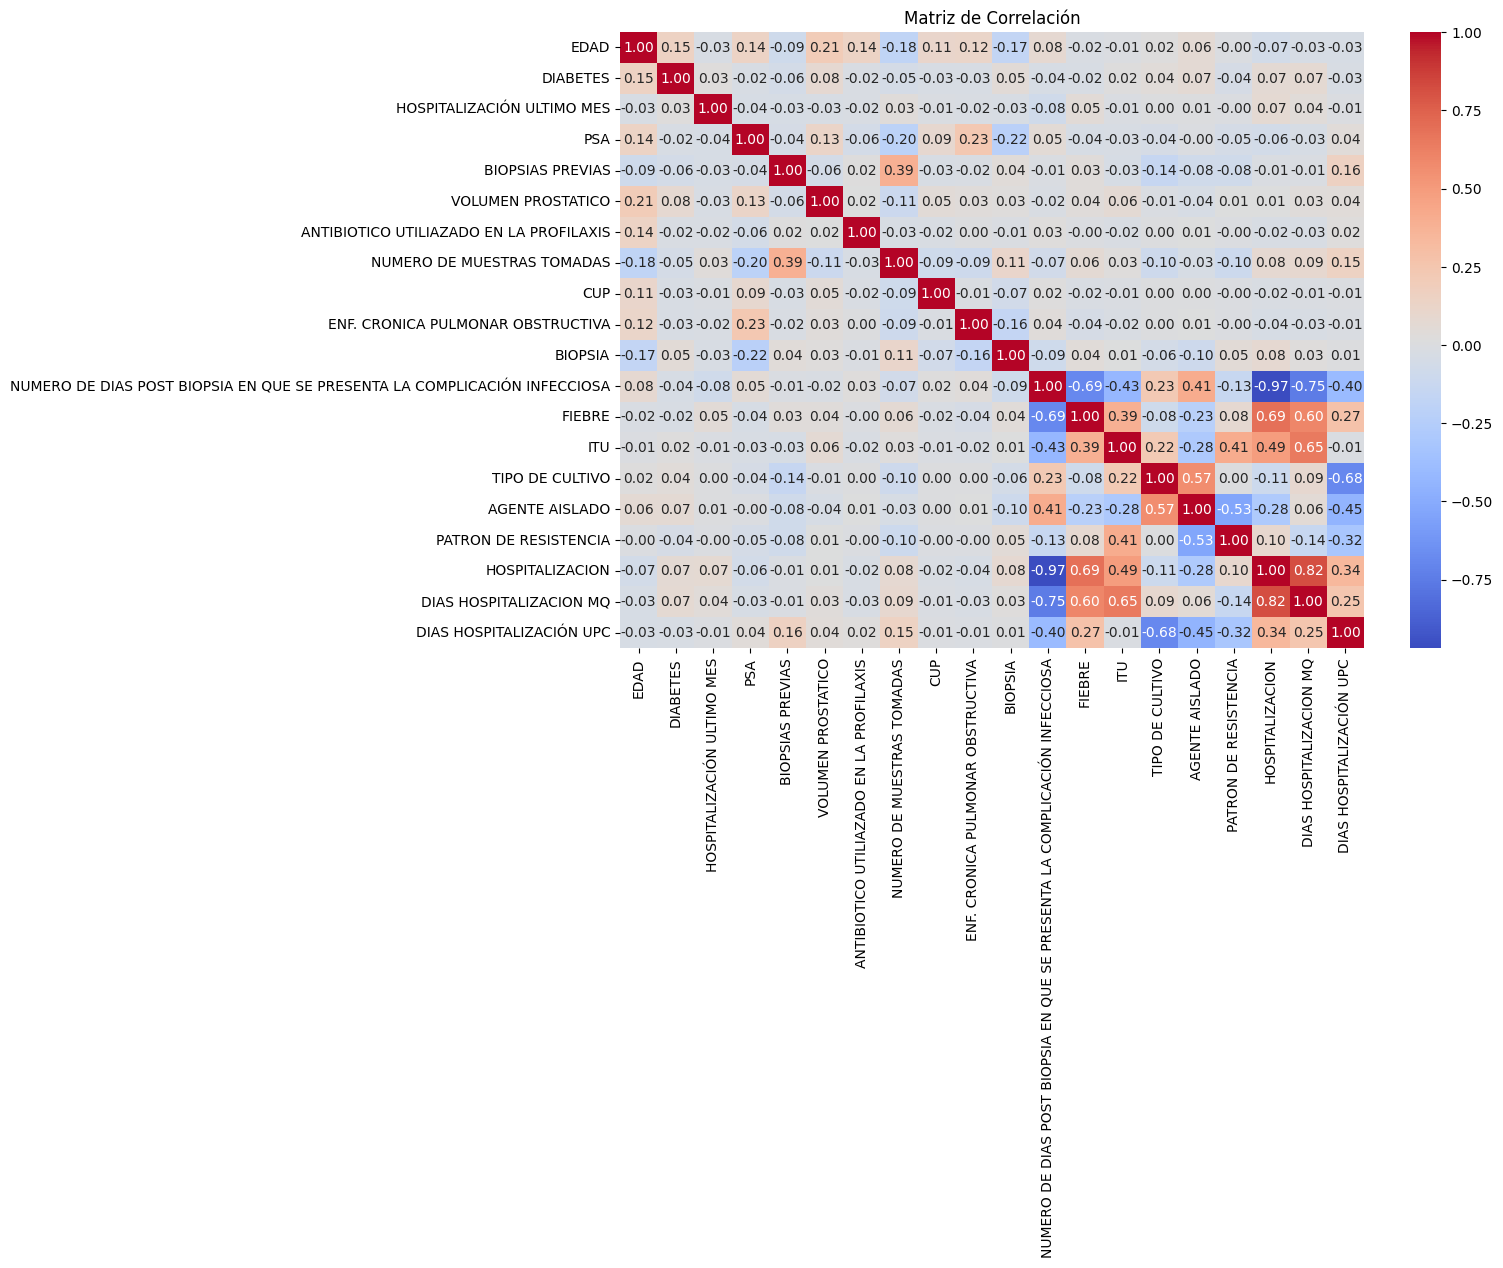

Variables redundantes: ['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'NUMERO DE MUESTRAS TOMADAS', 'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA', 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA', 'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO', 'PATRON DE RESISTENCIA', 'HOSPITALIZACION', 'DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC']


In [25]:
# Matriz de correlación
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Identificar variables altamente correlacionadas (umbral de correlación > 0.8)
high_correlation = correlation_matrix.abs() > 0.8
redundant_features = [column for column in high_correlation.columns if any(high_correlation[column])]

print("Variables redundantes:", redundant_features)

# Eliminar variables redundantes
data.drop(columns=redundant_features, inplace=True)

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [26]:
# Verificar que no hay valores nulos antes de exportar
print(data_cleaned.isnull().sum())

# Exportar a CSV
csv_file_path = 'BBDD_Hospitalización_Preparada.csv'
data_cleaned.to_csv(csv_file_path, index=False)

print(f"Archivo exportado exitosamente a: {csv_file_path}")


EDAD                                                                         0
DIABETES                                                                     0
HOSPITALIZACIÓN ULTIMO MES                                                   0
PSA                                                                          0
BIOPSIAS PREVIAS                                                             0
VOLUMEN PROSTATICO                                                           0
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                      0
NUMERO DE MUESTRAS TOMADAS                                                   0
CUP                                                                          0
ENF. CRONICA PULMONAR OBSTRUCTIVA                                            0
BIOPSIA                                                                      0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA    0
FIEBRE                                              

Se ejecuta una vez mas unos graficos para corroborar las transformaciones hechas

   EDAD  DIABETES  HOSPITALIZACIÓN ULTIMO MES  PSA  BIOPSIAS PREVIAS  \
0  53.0         0                           0  4.0                 0   
1  56.0         0                           0  7.7                 0   
2  56.0         0                           0  7.0                 0   
3  55.0         1                           1  4.0                 0   
4  53.0         0                           0  7.0                 0   

   VOLUMEN PROSTATICO  ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  \
0                   1                                        1   
1                   1                                        1   
2                   1                                        1   
3                   1                                        1   
4                   1                                        1   

   NUMERO DE MUESTRAS TOMADAS  CUP  ENF. CRONICA PULMONAR OBSTRUCTIVA  \
0                        12.0    0                                  0   
1                       

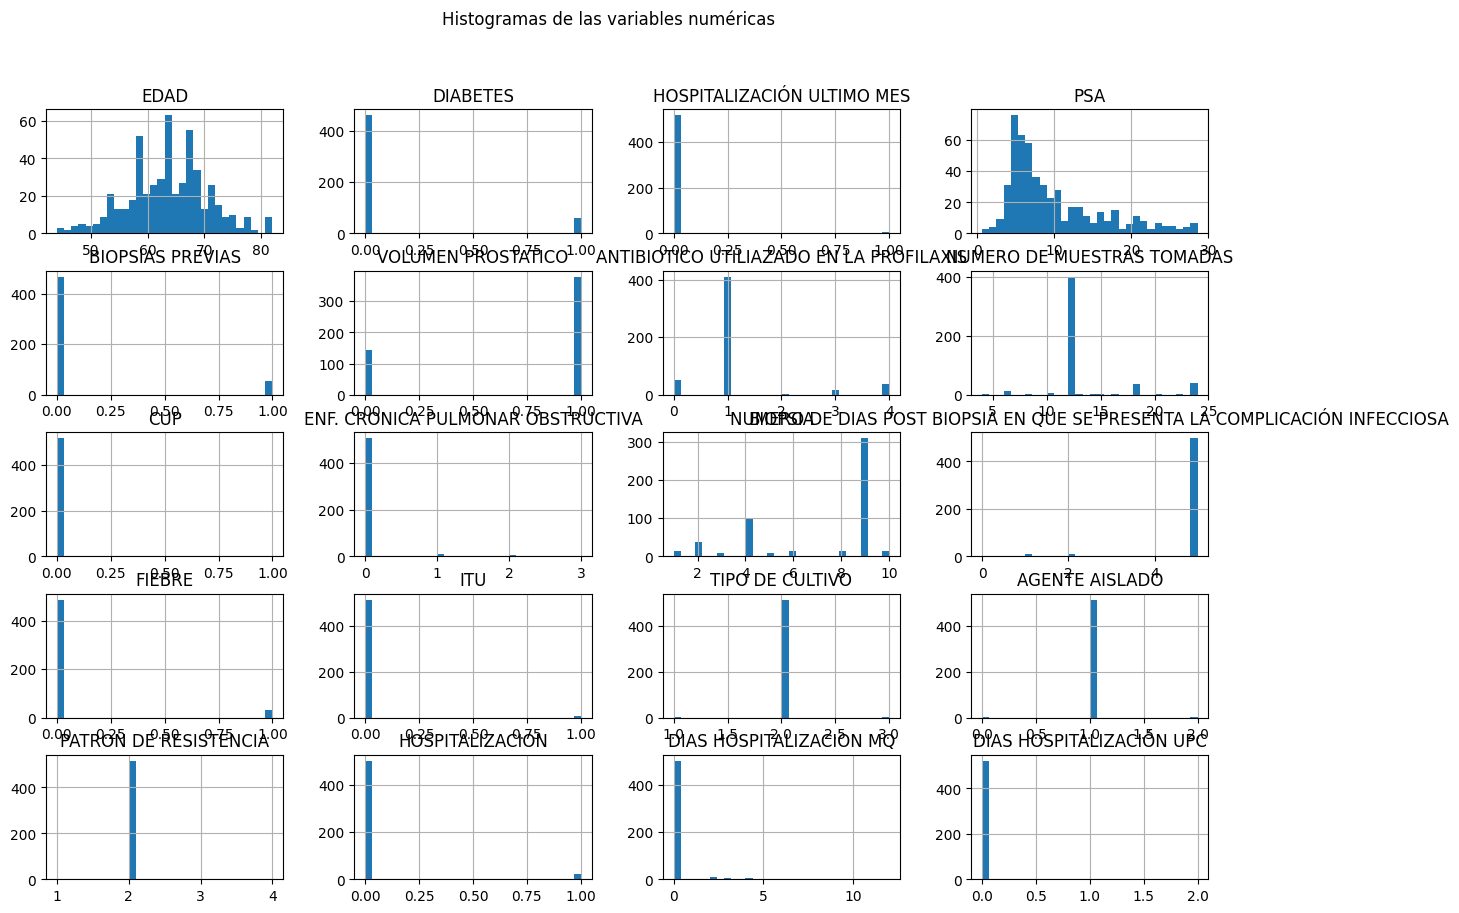

In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
data = pd.read_csv('BBDD_Hospitalización_Preparada.csv')

# Revisar la estructura del dataset
print(data.head())
print(data.info())

# Histograma
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogramas de las variables numéricas')
plt.show()

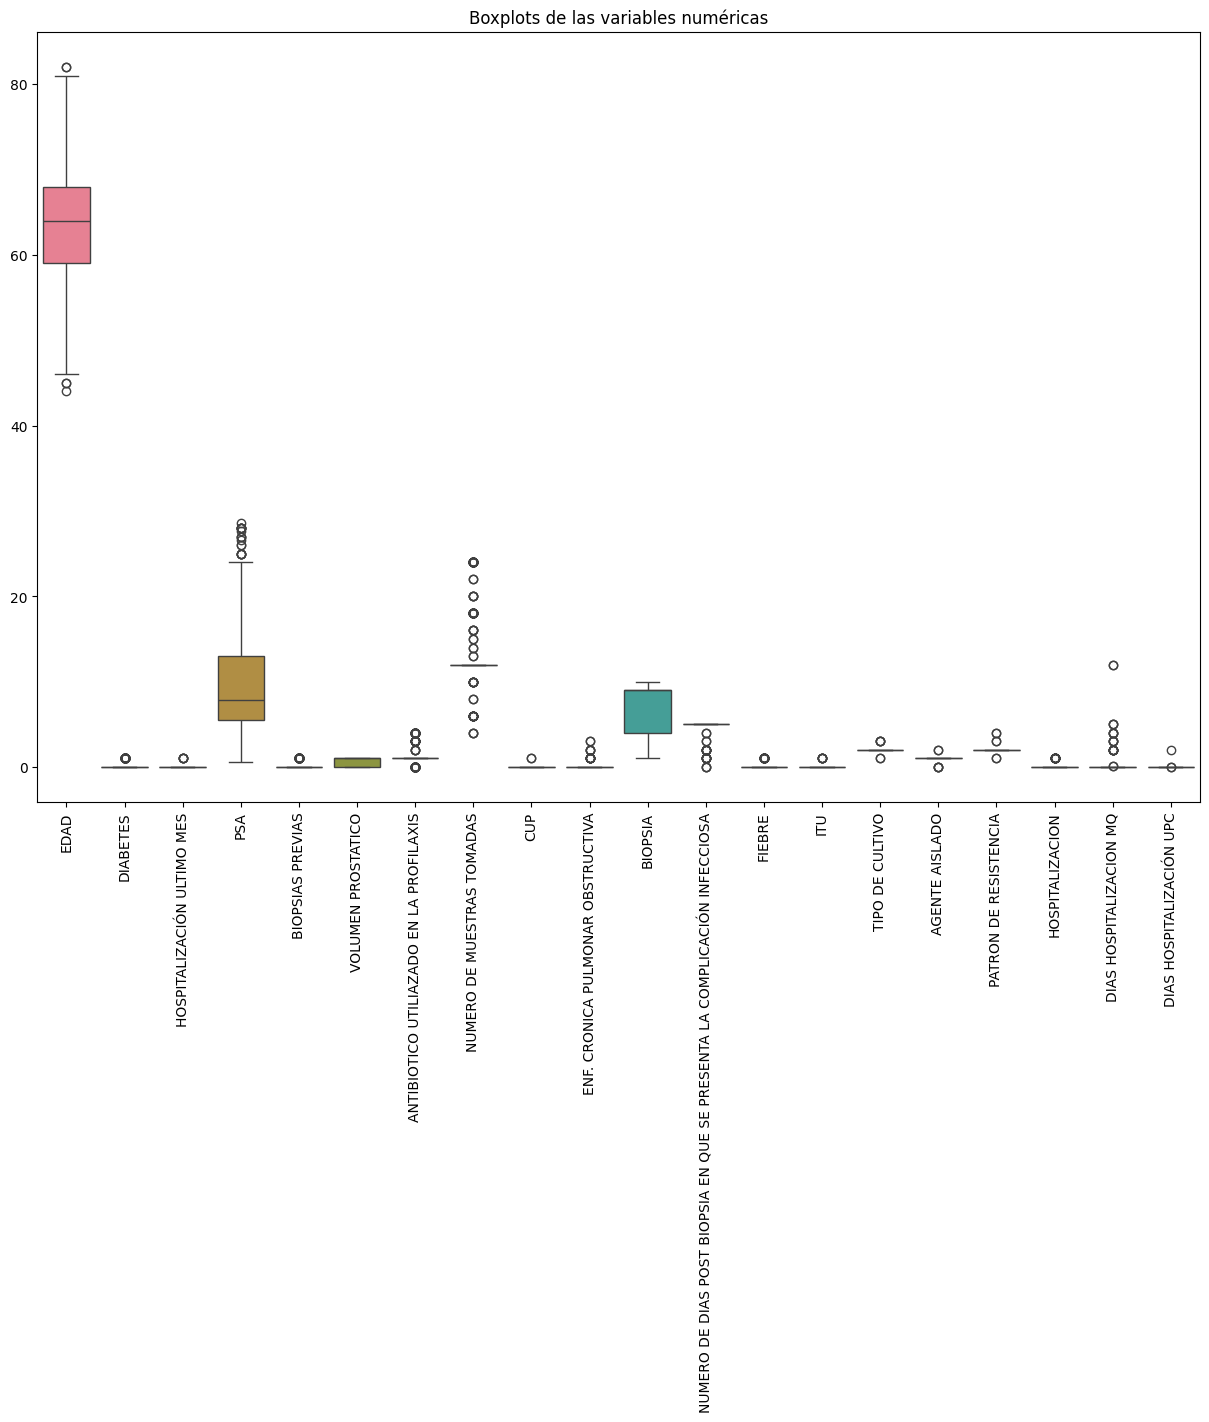

In [29]:


# Boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.select_dtypes(include=[np.number]))
plt.title('Boxplots de las variables numéricas')
plt.xticks(rotation=90)
plt.show()

C:\Users\Familia\AppData\Local\Temp\ipykernel_21436\52920556.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, label=column)
C:\Users\Familia\AppData\Local\Temp\ipykernel_21436\52920556.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, label=column)
C:\Users\Familia\AppData\Local\Temp\ipykernel_21436\52920556.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, label=column)
C:\Users\Familia\AppData\Local\Temp\ipykernel_21436\52920556.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become a

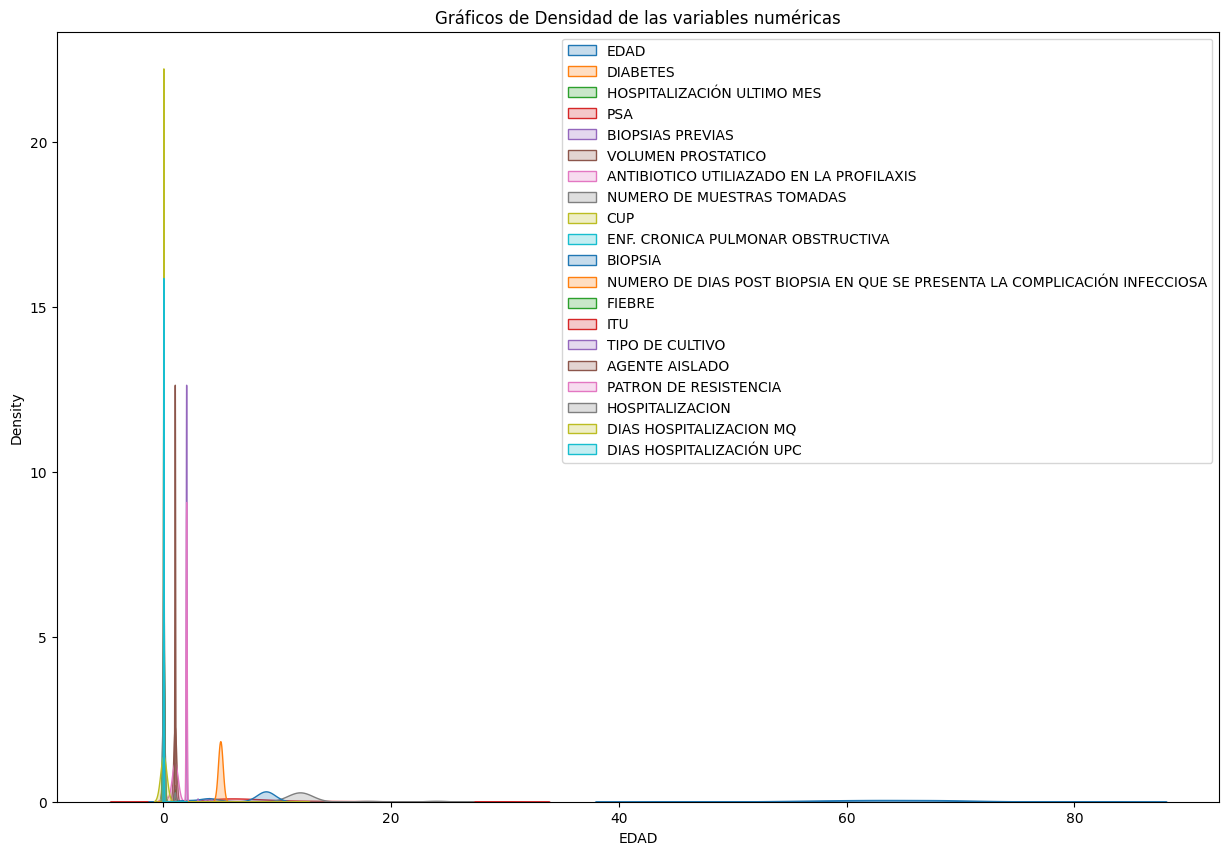

In [30]:
# Gráficos de Densidad
plt.figure(figsize=(15, 10))
for column in data.select_dtypes(include=[np.number]).columns:
    sns.kdeplot(data[column], shade=True, label=column)
plt.title('Gráficos de Densidad de las variables numéricas')
plt.legend()
plt.show()

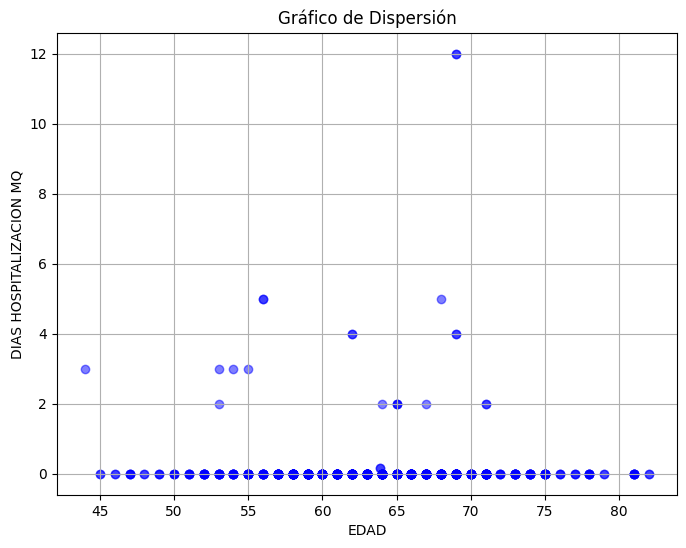

In [31]:
# Extraer las columnas de interés para el gráfico de dispersión
x = data['EDAD']
y = data['DIAS HOSPITALIZACION MQ']

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.scatter(x, y, color='blue', marker='o', alpha=0.5)  # Scatter plot

# Personalizar el gráfico
plt.title('Gráfico de Dispersión')
plt.xlabel('EDAD')
plt.ylabel('DIAS HOSPITALIZACION MQ')
plt.grid(True)  # Mostrar cuadrícula

# Mostrar el gráfico
plt.show()